<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/11/TensorFlowLogo.svg/2000px-TensorFlowLogo.svg.png" width="500"/>

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Perceptrón

<img src="http://ataspinar.com/wp-content/uploads/2016/11/perceptron_schematic_overview.png" />

# Regresión Logística

<img src="http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1523361626/linear_vs_logistic_regression_h8voek.jpg" width="700"/>

# Iris

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()
xr = iris.data[:, (2, 3)]
yr = (iris.target == 0).astype(np.int).reshape([-1,1])

In [3]:
tf.reset_default_graph()

X = tf.placeholder(shape=[None,2], dtype=tf.float32)
y = tf.placeholder(shape=[None,1], dtype=tf.float32)

W = tf.Variable(tf.random_uniform([2, 1]))
b = tf.Variable(tf.random_uniform([1, 1]))
z_pred = tf.matmul(X, W)+b

<img src="https://analyticsindiamag.com/wp-content/uploads/2018/01/sigmoid-equation.png" />

In [4]:
y_pred = tf.sigmoid(z_pred) #Acotado entre 0 y 1

<img src="https://cdn-images-1.medium.com/max/1600/1*gNuP7PN6sC42vAYWvoAMMA.png" width="500"/>

In [5]:
xentropy = -y*tf.log(y_pred)-(1-y)*tf.log(1-y_pred)
loss = tf.reduce_mean(xentropy)

In [6]:
learning_rate = 0.1
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss) 

In [7]:
n_epochs = 1000
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(n_epochs):
        _,cur_xentropy=sess.run([training_op,loss],feed_dict={X:xr,y:yr})
        if epoch % 100 == 0: print("Epoca", epoch, "Cross Entropy =", cur_xentropy)
    
    valW = W.eval()
    valb = b.eval()
    print(valW)
    print(valb)

Epoca 0 Cross Entropy = 2.085086
Epoca 100 Cross Entropy = 0.09556268
Epoca 200 Cross Entropy = 0.040116545
Epoca 300 Cross Entropy = 0.023855468
Epoca 400 Cross Entropy = 0.016376054
Epoca 500 Cross Entropy = 0.012166374
Epoca 600 Cross Entropy = 0.009504029
Epoca 700 Cross Entropy = 0.007686626
Epoca 800 Cross Entropy = 0.0063771117
Epoca 900 Cross Entropy = 0.005394697
[[-2.5632424]
 [-4.696219 ]]
[[9.961286]]


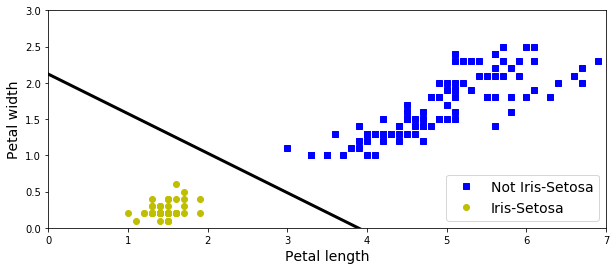

In [8]:
a = -valW[0] / valW[1]
b = -valb[0] / valW[1]

axes = [0, 7, 0, 3]

plt.figure(figsize=(10, 4))
plt.plot(xr[yr.reshape(-1)==0,0], xr[yr.reshape(-1)==0,1], "bs", label="Not Iris-Setosa")
plt.plot(xr[yr.reshape(-1)==1,0], xr[yr.reshape(-1)==1,1], "yo", label="Iris-Setosa")
plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)

plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)

plt.show()

# MNIST

## Manualmente

In [10]:
import struct
def read_idx(filename):
    with open(filename, 'rb') as f:
        zero, data_type, dims = struct.unpack('>HBB', f.read(4))
        shape = tuple(struct.unpack('>I', f.read(4))[0] for d in range(dims))
        return np.fromstring(f.read(), dtype=np.uint8).reshape(shape)

In [11]:
X_train = read_idx('t10k-images.idx3-ubyte')
X_test = read_idx('train-images.idx3-ubyte')
y_train_num = read_idx('t10k-labels.idx1-ubyte')
y_test_num = read_idx('train-labels.idx1-ubyte')

/home/santa/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  


### One-Hot

In [12]:
y_train = np.zeros([y_train_num.shape[0],10])
y_test = np.zeros([y_test_num.shape[0],10])
y_train[np.arange(y_train_num.shape[0]),y_train_num]=1
y_test[np.arange(y_test_num.shape[0]),y_test_num]=1
print(y_train_num[0],y_train[0])

7 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [11]:
#m=y_train_num.shape[0]
#n_batches = m//batch_size
#indices=np.arange(m)
#np.random.shuffle(indices)
#for batch in range(n_batches):
#            X_batch=xr[indices[batch*batch_size:(batch+1)*batch_size],:]
#            y_batch=yr[indices[batch*batch_size:(batch+1)*batch_size],:]

## Usando TF

In [13]:
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("/tmp/data/",one_hot=True)
X_train = mnist.train.images
X_test = mnist.test.images
y_train = mnist.train.labels.astype("int")
y_test = mnist.test.labels.astype("int")

URLError: <urlopen error [Errno -3] Temporary failure in name resolution>

y = [0 0 0 0 0 0 0 1 0 0]


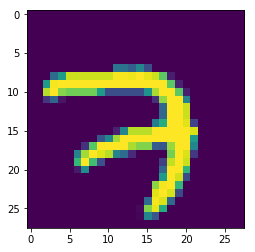

In [3]:
ej=0
print('y =',y_train[ej])
plt.imshow(X_train[ej].reshape([28,28]))

## MonoLayer

In [ ]:
n_inputs = 28*28  # MNIST
n_outputs = 10

In [ ]:
tf.reset_default_graph()

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None,n_outputs), name="y")

In [ ]:
W = tf.Variable(tf.random_uniform([n_inputs, n_outputs]))
b = tf.Variable(tf.zeros([n_outputs]))
logits= tf.matmul(X, W) + b

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQw0ezjyWQtPMQRSlLJHkCB6rk8QJXA68HMw6NDWyiWTFnp_O-Igg"/>

In [ ]:
y_pred=tf.nn.softmax(logits)

In [ ]:
xentropy = tf.nn.softmax_cross_entropy_with_logits_v2(labels=y,logits=logits)
loss = tf.reduce_mean(xentropy, name="loss")

In [ ]:
learning_rate = 0.01
optimizer = tf.train.AdamOptimizer(learning_rate)
training_op = optimizer.minimize(loss)

In [ ]:
correct = tf.equal(tf.argmax(y,1),tf.argmax(y_pred,1))
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [ ]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [ ]:
n_epochs = 10
batch_size = 32
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_test = accuracy.eval(feed_dict={X: mnist.test.images,y: mnist.test.labels})
        print(epoch, "Train accuracy:", acc_train, "Test accuracy:", acc_test)

    save_path = saver.save(sess, "./my_model_final.ckpt")

# ReLu

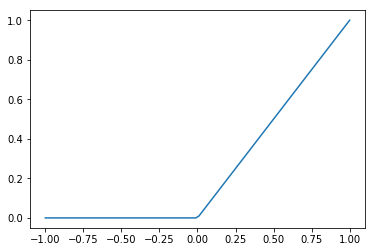

In [75]:
def relu(x):
    return max(0,x)
xr=np.linspace(-1,1,100)
yr=[relu(x) for x in xr]
plt.plot(xr,yr)

# MultiLayer

In [ ]:
n_inputs = 28*28  # MNIST
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

In [ ]:
def neuron_layer(X, n_neurons, name, activation=None):
    with tf.name_scope(name):
        n_inputs = int(X.get_shape()[1])
        init = tf.random_uniform([n_inputs, n_neurons])
        W = tf.Variable(init, name="kernel")
        b = tf.Variable(tf.zeros([n_neurons]), name="bias")
        Z = tf.matmul(X, W) + b
        if activation is not None:
            return activation(Z)
        else:
            return Z

In [ ]:
tf.reset_default_graph()
X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None,n_outputs), name="y")
hidden1 = neuron_layer(X, n_hidden1, name="hidden1",activation=tf.nn.relu)
hidden2 = neuron_layer(hidden1, n_hidden2, name="hidden2",activation=tf.nn.relu)
logits = neuron_layer(hidden2, n_outputs, name="outputs")
y_pred=tf.nn.softmax(logits)

In [ ]:
xentropy = tf.nn.softmax_cross_entropy_with_logits_v2(labels=y,logits=logits)
loss = tf.reduce_mean(xentropy, name="loss")

learning_rate = 0.01
optimizer = tf.train.AdamOptimizer(learning_rate)
training_op = optimizer.minimize(loss)

correct = tf.equal(tf.argmax(y,1),tf.argmax(y_pred,1))
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [ ]:
n_epochs = 10
batch_size = 50
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_test = accuracy.eval(feed_dict={X: mnist.test.images,y: mnist.test.labels})
        print(epoch, "Train accuracy:", acc_train, "Test accuracy:", acc_test)

    save_path = saver.save(sess, "./my_model_final.ckpt")

# Dense

In [ ]:
n_inputs = 28*28  # MNIST
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

In [ ]:
tf.reset_default_graph()
X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y") 
hidden1 = tf.layers.dense(X, n_hidden1, name="hidden1",activation=tf.nn.relu)
hidden2 = tf.layers.dense(hidden1, n_hidden2, name="hidden2",activation=tf.nn.relu)
logits = tf.layers.dense(hidden2, n_outputs, name="outputs")
y_pred=tf.nn.softmax(logits)

In [ ]:
xentropy = tf.nn.softmax_cross_entropy_with_logits_v2(labels=y,logits=logits)
loss = tf.reduce_mean(xentropy, name="loss")

learning_rate = 0.01
optimizer = tf.train.AdamOptimizer(learning_rate)
training_op = optimizer.minimize(loss)

correct = tf.equal(tf.argmax(y,1),tf.argmax(y_pred,1))
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [ ]:
n_epochs = 10
batch_size = 50
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_test = accuracy.eval(feed_dict={X: mnist.test.images, y: mnist.test.labels})
        print(epoch, "Train accuracy:", acc_train, "Test accuracy:", acc_test)

    save_path = saver.save(sess, "./my_model_final.ckpt")

# Regularization

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/02/Regularization.svg/354px-Regularization.svg.png"/>

## L2

In [2]:
n_inputs = 28*28  # MNIST
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

In [3]:
tf.reset_default_graph()
X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y") 
hidden1 = tf.layers.dense(X, n_hidden1, name="hidden1",activation=tf.nn.relu)
hidden2 = tf.layers.dense(hidden1, n_hidden2, name="hidden2",activation=tf.nn.relu)
logits = tf.layers.dense(hidden2, n_outputs, name="outputs")
y_pred=tf.nn.softmax(logits)

In [4]:
xentropy = tf.nn.softmax_cross_entropy_with_logits_v2(labels=y,logits=logits)
base_loss = tf.reduce_mean(xentropy, name="loss")

In [7]:
W1 = tf.get_default_graph().get_tensor_by_name("hidden1/kernel:0")
b1 = tf.get_default_graph().get_tensor_by_name("hidden1/bias:0")

W2 = tf.get_default_graph().get_tensor_by_name("hidden2/kernel:0")
b2 = tf.get_default_graph().get_tensor_by_name("hidden2/bias:0")

W3 = tf.get_default_graph().get_tensor_by_name("outputs/kernel:0")
b3 = tf.get_default_graph().get_tensor_by_name("outputs/bias:0")

In [8]:
scale = 0.001
reg_loss = scale*(tf.reduce_sum(tf.square(W1))+tf.reduce_sum(tf.square(W2))+tf.reduce_sum(tf.square(W3)))

In [9]:
loss = base_loss+reg_loss

In [10]:
learning_rate = 0.01
optimizer = tf.train.AdamOptimizer(learning_rate)
training_op = optimizer.minimize(loss)

correct = tf.equal(tf.argmax(y,1),tf.argmax(y_pred,1))
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [ ]:
n_epochs = 10
batch_size = 50
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_test = accuracy.eval(feed_dict={X: mnist.test.images, y: mnist.test.labels})
        print(epoch, "Train accuracy:", acc_train, "Test accuracy:", acc_test)

    save_path = saver.save(sess, "./my_model_final.ckpt")

## Dropout

<img src="https://ai2-s2-public.s3.amazonaws.com/figures/2017-08-08/34f25a8704614163c4095b3ee2fc969b60de4698/2-Figure1-1.png" width="700"/>

In [4]:
n_inputs = 28*28  # MNIST
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10
dropout_rate = 0.5

In [6]:
tf.reset_default_graph()
X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y") 

X_drop = tf.layers.dropout(X, dropout_rate)

hidden1 = tf.layers.dense(X, n_hidden1, name="hidden1",activation=tf.nn.relu)
hidden1_drop = tf.layers.dropout(hidden1, dropout_rate)

hidden2 = tf.layers.dense(hidden1_drop, n_hidden2, name="hidden2",activation=tf.nn.relu)
hidden2_drop = tf.layers.dropout(hidden2, dropout_rate)

logits = tf.layers.dense(hidden2_drop, n_outputs, name="outputs")
y_pred=tf.nn.softmax(logits)

In [7]:
xentropy = tf.nn.softmax_cross_entropy_with_logits_v2(labels=y,logits=logits)
loss = tf.reduce_mean(xentropy, name="loss")

learning_rate = 0.01
optimizer = tf.train.AdamOptimizer(learning_rate)
training_op = optimizer.minimize(loss)

correct = tf.equal(tf.argmax(y,1),tf.argmax(y_pred,1))
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [10]:
n_epochs = 10
batch_size = 50
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_test = accuracy.eval(feed_dict={X: mnist.test.images, y: mnist.test.labels})
        print(epoch, "Train accuracy:", acc_train, "Test accuracy:", acc_test)

    save_path = saver.save(sess, "./my_model_final.ckpt")

0 Train accuracy: 0.94 Test accuracy: 0.9412
1 Train accuracy: 0.98 Test accuracy: 0.9547
2 Train accuracy: 0.96 Test accuracy: 0.9548
3 Train accuracy: 0.96 Test accuracy: 0.9587
4 Train accuracy: 0.98 Test accuracy: 0.9679


# Tensorboard

In [66]:
m=100
xr=np.linspace(0,1,m).reshape(m,1)
yr=3*xr+5+np.random.rand(m,1)

In [67]:
tf.reset_default_graph()

X = tf.placeholder(shape=[None,1],dtype=tf.float32,name="X")
y = tf.placeholder(shape=[None,1],dtype=tf.float32,name="y")

hidden1 = tf.layers.dense(X,16,name="hidden1",activation=tf.nn.relu)
hidden2 = tf.layers.dense(hidden1,32,name="hidden2",activation=tf.nn.relu)
hidden3 = tf.layers.dense(hidden2,16,name="hidden3",activation=tf.nn.relu)

y_pred = tf.layers.dense(hidden3,1,name="out")
error = y_pred - y
mse = tf.reduce_mean(tf.square(error))

learning_rate = 0.1
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(mse) 

In [68]:
mse_summary = tf.summary.scalar('MSE', mse)
file_writer = tf.summary.FileWriter('logs', tf.get_default_graph())

In [69]:
n_epochs = 1000

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    for epoch in range(n_epochs):
        sess.run(training_op,feed_dict={X:xr,y:yr})
        if epoch % 100 == 0: print("Epoca", epoch, "MSE =", mse.eval(feed_dict={X:xr,y:yr}))
        summary_str = mse_summary.eval(feed_dict={X:xr,y:yr})
        file_writer.add_summary(summary_str, epoch)    
file_writer.close()

Epoca 0 MSE = 36.49345
Epoca 100 MSE = 0.08034406
Epoca 200 MSE = 0.07952296
Epoca 300 MSE = 0.07950809
Epoca 400 MSE = 0.079490654
Epoca 500 MSE = 0.07946965
Epoca 600 MSE = 0.07944524
Epoca 700 MSE = 0.079417296
Epoca 800 MSE = 0.079385385
Epoca 900 MSE = 0.079350136


tensorboard --logdir logs/